In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [2]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
 target_size = (224, 224),
 batch_size = 32,
 class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import load_model

# Model saved with Keras model.save()
MODEL_PATH ='model_vgg19.h5'

# Load your trained model
model = load_model(MODEL_PATH)

In [4]:
 y_pred = model.predict(test_set)

In [5]:
y_pred

array([[3.51420522e-01, 6.48579478e-01],
       [3.15008223e-01, 6.84991777e-01],
       [2.49052513e-02, 9.75094676e-01],
       [8.44473004e-01, 1.55527011e-01],
       [9.99973655e-01, 2.63286001e-05],
       [9.99937415e-01, 6.25946559e-05],
       [1.16299026e-01, 8.83701026e-01],
       [2.67133638e-02, 9.73286688e-01],
       [9.64657664e-01, 3.53423730e-02],
       [9.99940872e-01, 5.91624339e-05],
       [2.26018913e-02, 9.77398098e-01],
       [7.79348314e-02, 9.22065198e-01],
       [4.65420596e-02, 9.53457952e-01],
       [8.48463356e-01, 1.51536673e-01],
       [9.99068439e-01, 9.31616058e-04],
       [7.60960579e-02, 9.23903942e-01],
       [9.80807245e-01, 1.91927906e-02],
       [9.93485034e-01, 6.51501724e-03],
       [5.64740658e-01, 4.35259372e-01],
       [1.13631934e-01, 8.86368096e-01],
       [9.99504447e-01, 4.95534972e-04],
       [9.99584496e-01, 4.15479502e-04],
       [1.78368106e-01, 8.21631908e-01],
       [7.74592161e-01, 2.25407809e-01],
       [9.967498

In [6]:
import numpy as np
y_pred=np.argmax(y_pred, axis=1)

In [57]:
y_pred[48:]

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [8]:
test_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [56]:
y_true=test_set.classes
y_true[48:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
from sklearn.metrics import confusion_matrix
cf_matrix =confusion_matrix(y_pred[48:],y_true[48:])

In [59]:
group_names = ["True Infected","False Uninfected","False Infected","True Uninfected"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

In [60]:
labels = np.asarray(labels).reshape(2,2)
print(labels)

[['True Infected\n23\n26.74%' 'False Uninfected\n30\n34.88%']
 ['False Infected\n20\n23.26%' 'True Uninfected\n13\n15.12%']]


In [63]:
import seaborn as sns


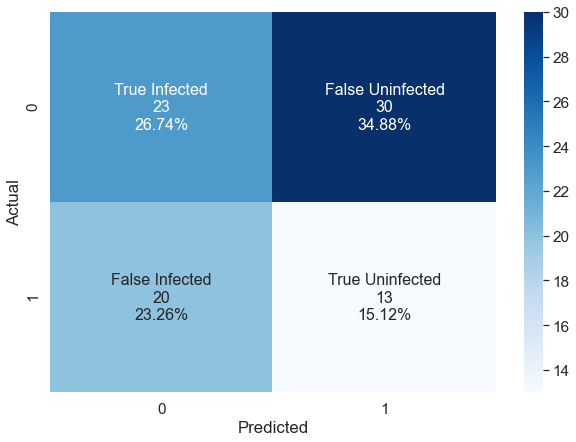

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=labels ,annot_kws={"size": 16},fmt = "")